# Assignment 1 (shortened)

This notebook contains three exercises from the exercise sets we covered prior to moving the teaching online. It will count as one of the two assignments you need to submit to qualify for the exam. **The deadline** for handing in this assignment is **April 3.** You hand in by pushing your solutions to your folder in the exercise repo.

## Problems from exercise set 2
> **Ex. 2.1.1**: The performance of a random forest classifier is highly sensitive to hyper parameters. Therefore, you should be intimately familiar with what the most important ones do. For each point below, explain what the hyper parameter pertaining to `sklearn.ensemble.RandomForestClassifier` controls, and how setting it either too low or too high (or True/False) might hurt model performance:
1. `n_estimators`
2. `max_depth`
3. `max_features`
4. `bootstrap`

1. n_estimators are the trees you build in the decision tree. The higher number of n_estimators enusres the perfomance of the code and give stronger predictions.
However, the n_estimators include diminishing returns and thus comes with a computational risk you should therefor tune as high af value as the processor can handle.

2. max_depth is the maximum depth of the tree. The deeper the tree the more complex the decisions get, and could result in overfitting the model making it useless in real applications.
If there max_depth is set to "None" then nodes are expanded until all leaves are pure or until the all leaves contain less than the 
minimum_sample_split samples which is the minimum number of samples required to split an internal node.

3. max_features is the number of features to consider when looking for the best split. The max_features is set up as an if/then construction.
By specifying enough max_features you will obtain a better chance of finding the best split. Max_features can however increase the correlation and thus increase varitaion of the model.

4. Bootstrap is a boolean varible (True/False) and is used to sample out the datapoints. If False, the whole dataset is used to build each tree. 

> **Ex. 2.1.2**: For `n_estimators > 1`how should one set the hyper-parameters `max_features` and `bootstrap` so that all the trees in the ensemble end up identical?

It will depend on how the bootstrap is defined. If the bootstrap is False then the whole dataset is used to build each tree then you would have to have max_features = None  
which implies that setting max_features to the n number of features added in the dataset thus would yield identical trees. If the bootstrap is set as True it would create one random tree in the ensemble.

## Problems from exercise set 3

> **Ex. 3.1.2**: Reproduce the figure from the slides that compares PCA, LDA, t-SNE and UMAP as applied to the digits dataset.
1. Do it for the digits dataset (same as in slides)
2. Do it also for the wine dataset. What problems do you observe if you don't standardize the wine dataset? Why is this not a problem with the digits data?
3. Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data.
>
> *Hint: You can use [this class](https://github.com/ulfaslak/ulf_pytools/blob/7f4f1eb7e2d721851c8dacb20904478b19090f2a/ulf.py#L451) for making coloring easier. It lets you create a function that takes a category as input and returns an associated color. Read the docstring for usage example.*

C:\Users\Axel\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


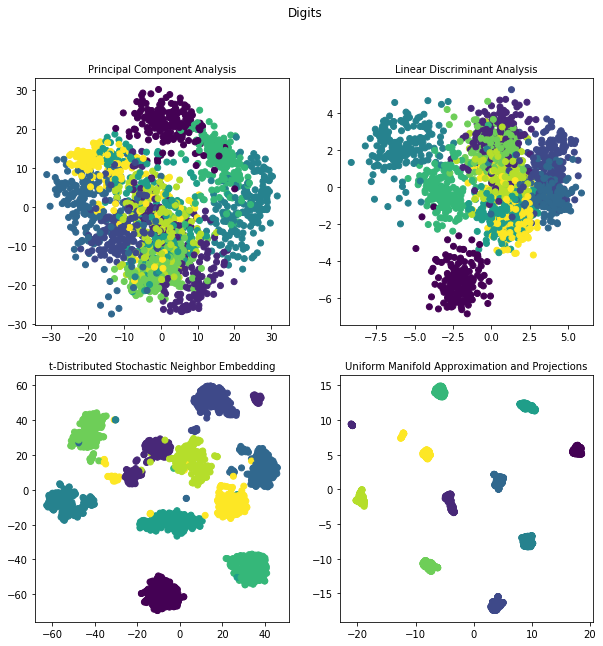

In [5]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits

%matplotlib inline
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler

from umap import UMAP
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Wine data
data_wine = load_wine()
X_wine = data_wine['data']
y_wine = data_wine['target']

# Digits data
data_digits = load_digits()
X_digits = data_digits['data']
y_digits = data_digits['target']

from sklearn.preprocessing import StandardScaler
import numpy as np


#For digits

PCAx = PCA().fit_transform(X_digits,y_digits)
    
LDAx = LDA().fit_transform(X_digits,y_digits)
    
tSNEx = TSNE().fit_transform(X_digits,y_digits)
    
umapx = UMAP().fit_transform(X_digits,y_digits)

#Plot for digits

fig = plt.figure(figsize=(10,10))
fig.suptitle("Digits")
plt.subplot(2,2,1)
plt.scatter(PCAx[:,0], PCAx[:,1], c=y_digits, cmap='viridis')
plt.title("Principal Component Analysis", fontsize=10)

plt.subplot(2,2,2)
plt.scatter(LDAx[:,0], LDAx[:,1], c=y_digits, cmap='viridis')
plt.title("Linear Discriminant Analysis", fontsize=10)

plt.subplot(2,2,3)
plt.scatter(tSNEx[:,0], tSNEx[:,1], c=y_digits, cmap='viridis')
plt.title("t-Distributed Stochastic Neighbor Embedding", fontsize=10)

plt.subplot(2,2,4)
plt.scatter(umapx[:,0], umapx[:,1], c=y_digits, cmap='viridis')
plt.title("Uniform Manifold Approximation and Projections", fontsize=10)

plt.show()


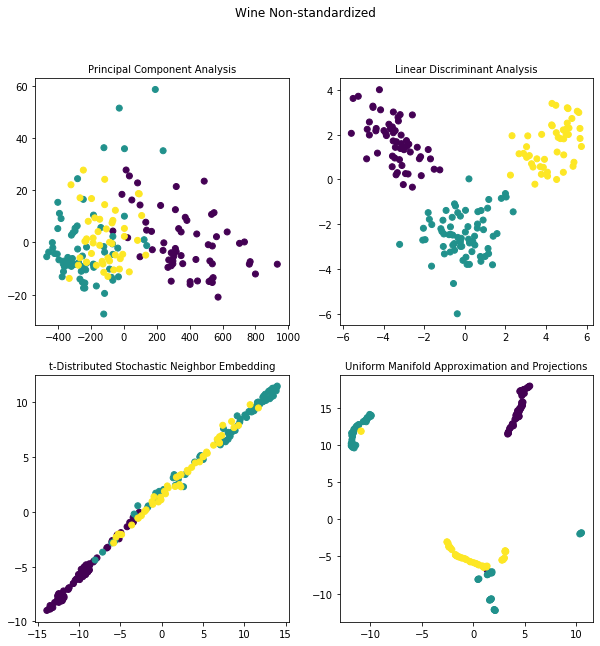

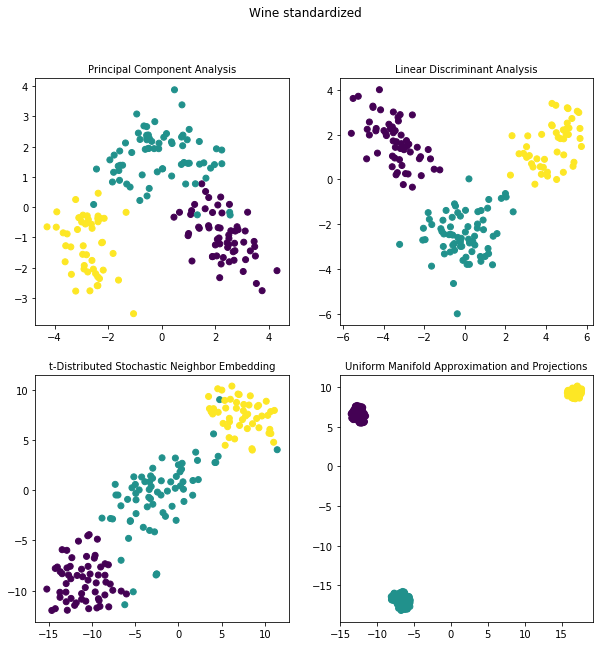

In [6]:
#For wine
PCAw = PCA().fit_transform(X_wine, y_wine)
    
LDAw = LDA().fit_transform(X_wine,y_wine)
    
tSNEw = TSNE().fit_transform(X_wine, y_wine)
    
umapw = UMAP().fit_transform(X_wine, y_wine)

#Plot for wine non_standardized values

fig = plt.figure(figsize=(10,10))
fig.suptitle("Wine Non-standardized")
plt.subplot(2,2,1)
plt.scatter(PCAw[:,0], PCAw[:,1], c=y_wine, cmap='viridis')
plt.title("Principal Component Analysis", fontsize=10)

plt.subplot(2,2,2)
plt.scatter(LDAw[:,0], LDAw[:,1], c=y_wine, cmap='viridis')
plt.title("Linear Discriminant Analysis", fontsize=10)

plt.subplot(2,2,3)
plt.scatter(tSNEw[:,0], tSNEw[:,1], c=y_wine, cmap='viridis')
plt.title("t-Distributed Stochastic Neighbor Embedding", fontsize=10)

plt.subplot(2,2,4)
plt.scatter(umapw[:,0], umapw[:,1], c=y_wine, cmap='viridis')
plt.title("Uniform Manifold Approximation and Projections", fontsize=10)

plt.show()

# Standardize
sc = StandardScaler()
X_std_wine = sc.fit_transform(X_wine)

PCAw_std = PCA().fit_transform(X_std_wine, y_wine)
    
LDAw_std = LDA().fit_transform(X_std_wine,y_wine)
    
tSNEw_std = TSNE().fit_transform(X_std_wine, y_wine)
    
umapw_std = UMAP().fit_transform(X_std_wine, y_wine)

#Plot for wine using the standardized values

fig = plt.figure(figsize=(10,10))
fig.suptitle("Wine standardized")
plt.subplot(2,2,1)
plt.scatter(PCAw_std[:,0], PCAw_std[:,1], c=y_wine, cmap='viridis')
plt.title("Principal Component Analysis", fontsize=10)

plt.subplot(2,2,2)
plt.scatter(LDAw_std[:,0], LDAw_std[:,1], c=y_wine, cmap='viridis')
plt.title("Linear Discriminant Analysis", fontsize=10)

plt.subplot(2,2,3)
plt.scatter(tSNEw_std[:,0], tSNEw_std[:,1], c=y_wine, cmap='viridis')
plt.title("t-Distributed Stochastic Neighbor Embedding", fontsize=10)

plt.subplot(2,2,4)
plt.scatter(umapw_std[:,0], umapw_std[:,1], c=y_wine, cmap='viridis')
plt.title("Uniform Manifold Approximation and Projections", fontsize=10)

plt.show()

#Plot for wine non-standardized values

If the standardized data is not used on the wine data the data points will cluster together as seen in the plots. By using standardized data the features scaling is more precise and variables with large outliers will not have major impacts on the data analysis. In this case the standardizing will project the original data into orthogonal direction trying to maximise the variance.

As the features are the same scale in the digits data standardizing will not have any major impact on the analysis.

For wine the PCA and LDA are good at seperting classes in to groups whereas it looks much more entangled in the Digits data. In both data groups the TSNE and UMAP plots show a very detailed seperations. The reason for PCA and LDA lower seperating ability in the digits data could be due to the dimensions of the input data. The wine data has 13 dimensions whereas the digits is 64-dimensional which could suggest that PCA and LDA are good for lower dimensional datapoints. 


## Problems from exercise set 4

In this problem we will try to implement and understand some of the ideas used in [Athey, Imbens (2015)](https://www.pnas.org/content/pnas/113/27/7353.full.pdf) to develop _Honest Inference_ in desicion tree models. The paper begins by covering honesty in a setting of population averages, and for estimating conditional means; so you will need to look towards the second half of the paper to get an impression of it's use for treatment-effect estimation.

> **Ex. 4.2.1:** What does it mean that a tree is _honest?_ In particular what are the implications in terms of 
> * The intuition for why honesty is required in order to get good local treatment effect estimates?
> * The practical implementation of the DT algorithm?

For a tree to be honest Athey, Imbens suggests to split a model by not using the same information in selection of the model structure as used in selecting the esitmation in the 
estimation of the model struture. By splitting up the steps mentioned into a construction part (including cross-validation) and an estimation part (estimating treatment effects withing leaves of the tree) they would secure an honest tree. 
By applying the same steps to the treatment effect estimation the two terms reward different type of features. 
They reduce the variance of a treatment effect estimator by introducing a split resulting in more homogeneous leaves and thus lower variance estimates of the treatment- and control group outcomes.

Honesty introduces the possibility of providing unbiased estimates. The intiution behind the above is the same as splitting a dataset into train and test to secure an honest evalution of the treatment effects.